# Boston Housing Data Analysis and Intepretation

## Importing all Key libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

## Loading the Data

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Function to show seaborn plot values

In [3]:
def show_values(axs, orient="v", space=.01):
    """Function to show plot values"""
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                #value = '{:.1f}'.format(p.get_height())
                value = '{:,d}'.format(int(p.get_height()))
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                #value = '{:.1f}'.format(p.get_width())
                value = '{:,d}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# 1 Data Visualization
***

### *1.1 Boxplot of Median value of owner-occupied homes*

Text(0.5, 0, "MEDV in 000's USD")

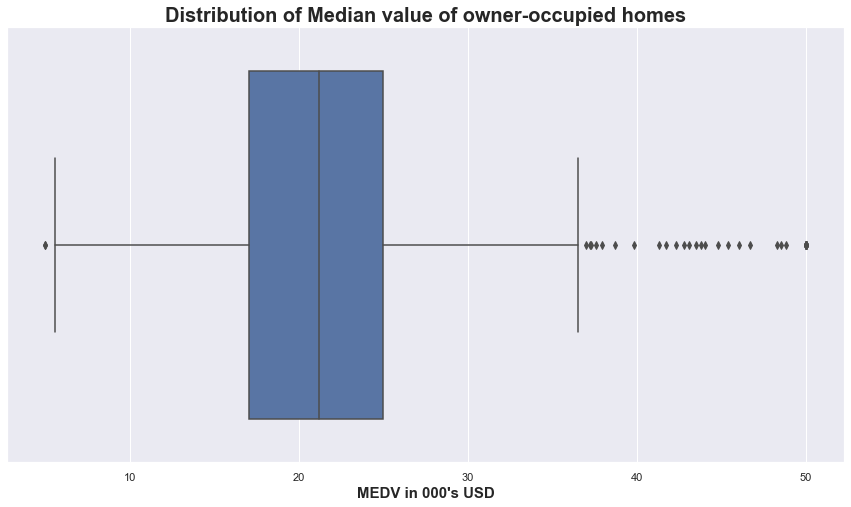

In [4]:
#sns.set_theme(style="whitegrid")
sns.set_style("darkgrid")
#sns.set_style("darkgrid", {'grid.color': '.5'})
#sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="MEDV", data = boston_df)
ax.set_title('Distribution of Median value of owner-occupied homes', fontsize = 20,weight='bold')
ax.set_xlabel("MEDV in 000's USD",fontsize = 15, weight='bold')

### *1.2 bar plot for the Charles river variable*

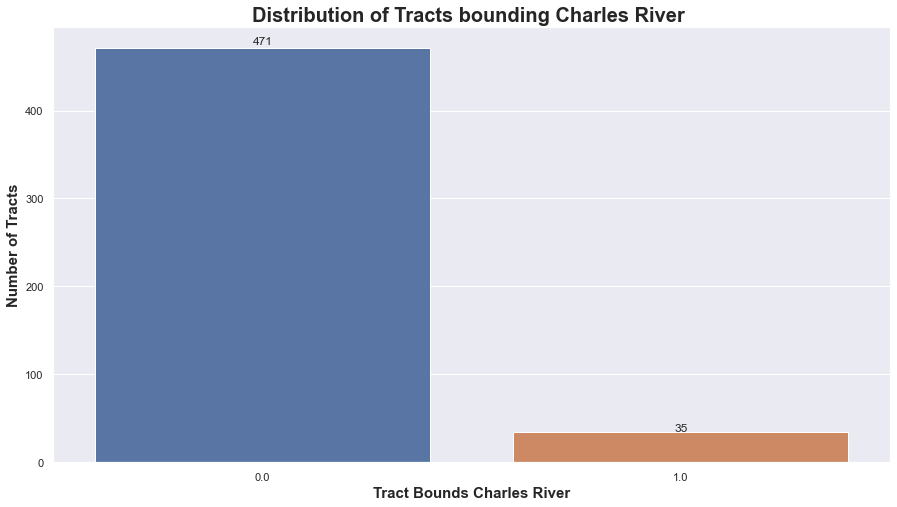

In [5]:
ax = sns.countplot(x="CHAS", data = boston_df)
ax.set_title('Distribution of Tracts bounding Charles River ', fontsize = 20,weight='bold')
ax.set_xlabel("Tract Bounds Charles River",fontsize = 15,weight='bold' )
ax.set_ylabel('Number of Tracts',fontsize = 15,weight='bold' )
show_values(ax)

### *1.3 Box plot for MEDV by AGE category*

Text(0, 0.5, "MEDV in 000's USD")

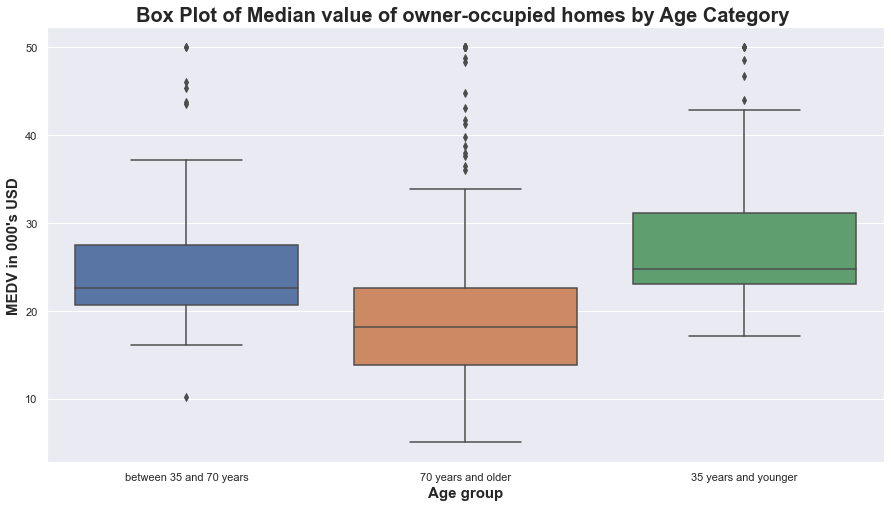

In [6]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x='age_group' ,y="MEDV", data = boston_df)
ax.set_title('Box Plot of Median value of owner-occupied homes by Age Category ', fontsize = 20,weight='bold')
ax.set_xlabel("Age group",fontsize = 15,weight='bold' )
ax.set_ylabel("MEDV in 000's USD",fontsize = 15,weight='bold' )

### *1.4 Scatter plot between Nitric Oxide concentrations and Proportion of non-retail business acres per town*

Text(0, 0.5, 'Non-retail Business Acres Per Town %')

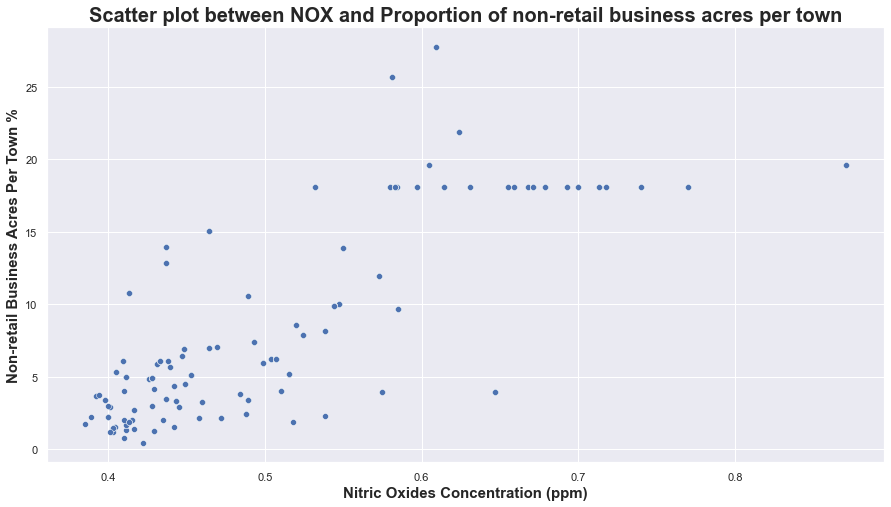

In [7]:
ax = sns.scatterplot(x="NOX", y="INDUS",data = boston_df)
ax.set_title('Scatter plot between NOX and Proportion of non-retail business acres per town', fontsize = 20,weight='bold')
ax.set_xlabel("Nitric Oxides Concentration (ppm)",fontsize = 15,weight='bold' )
ax.set_ylabel('Non-retail Business Acres Per Town %',fontsize = 15,weight='bold' )

### *1.5 Histogram showing distribution of pupil to teacher ratio*

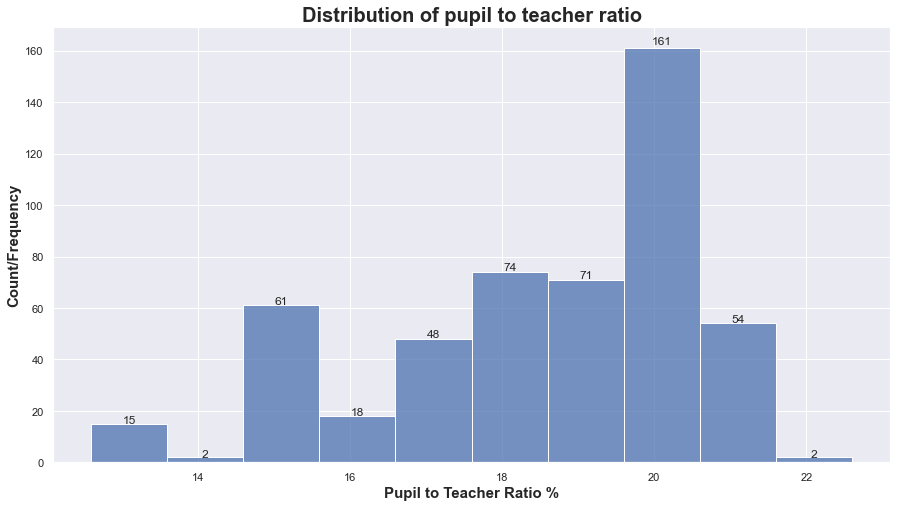

In [8]:
ax = sns.histplot(x="PTRATIO", binwidth = 1, discrete=False, data = boston_df)
ax.set_title('Distribution of pupil to teacher ratio', fontsize = 20,weight='bold')
ax.set_xlabel("Pupil to Teacher Ratio %",fontsize = 15,weight='bold' )
ax.set_ylabel('Count/Frequency',fontsize = 15,weight='bold' )
show_values(ax)

In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  age_group   506 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 59.4+ KB


In [10]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# 2 Testing Relationships in the data

###  *2.1 T-Test: Is there a significant difference in median value of houses bounded by the Charles river or not?*

Hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no significant difference in median value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a significant difference in median value of houses bounded by the Charles river or not")

Text(0, 0.5, "MEDV in 000's USD")

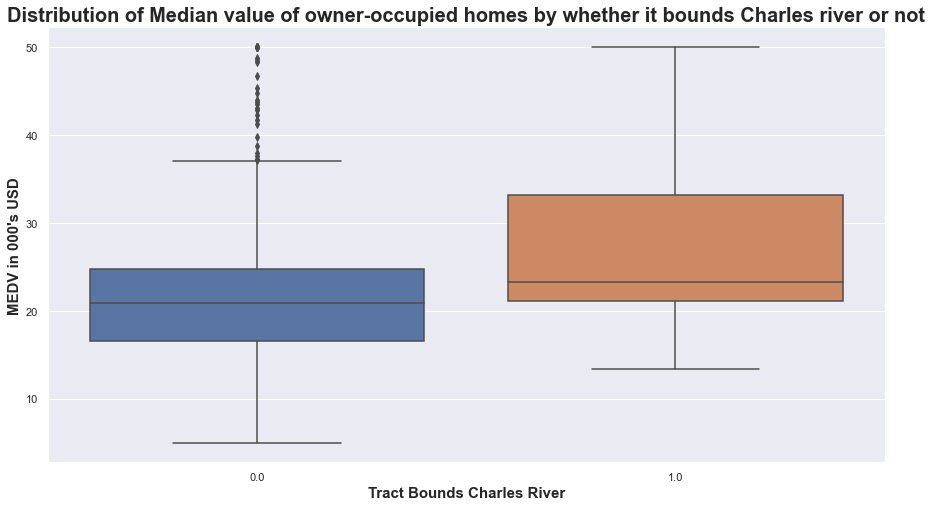

In [11]:
ax = sns.boxplot(y="MEDV", x="CHAS", data = boston_df)
ax.set_title('Distribution of Median value of owner-occupied homes by whether it bounds Charles river or not', fontsize = 20,weight='bold')
ax.set_xlabel('Tract Bounds Charles River',fontsize = 15, weight='bold')
ax.set_ylabel("MEDV in 000's USD",fontsize = 15,weight='bold' )

In [12]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

# since the p-value is less than 0.05 we can assume non equal variance

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [13]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)


Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a significant difference in median value of houses bounded by the Charles river over those not bounded, the median value is higher on the ones bounded by the river

###  *2.2 ANOVA: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?*

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

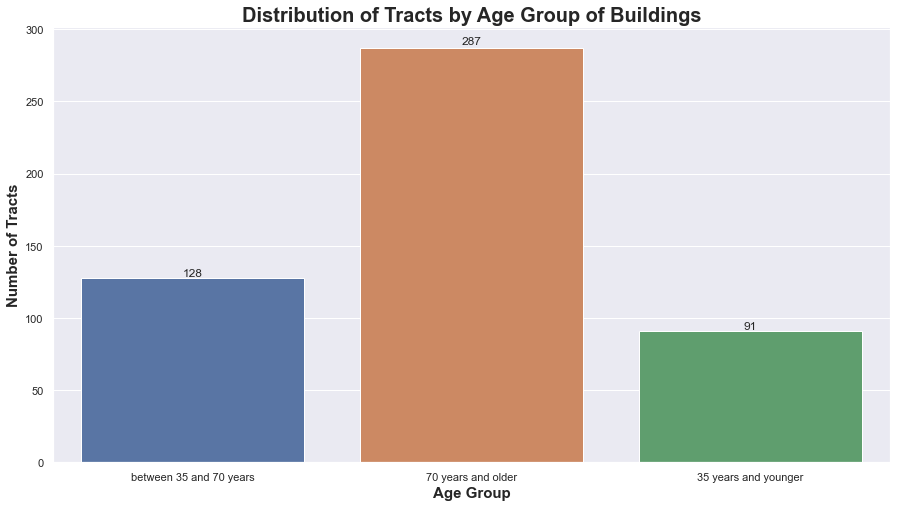

In [14]:
ax = sns.countplot(x="age_group", data = boston_df)
ax.set_title('Distribution of Tracts by Age Group of Buildings', fontsize = 20,weight='bold')
ax.set_xlabel("Age Group",fontsize = 15,weight='bold' )
ax.set_ylabel('Number of Tracts',fontsize = 15,weight='bold' )
show_values(ax)

In [15]:
scipy.stats.levene(boston_df[boston_df['age_group'] =='35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] =='between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] =='70 years and older']['MEDV'], center='mean')

# since the p-value is greater than 0.05 we can assume equal variance along all 3 subsets

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [16]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group'] =='35 years and younger']['MEDV'], 
                                            boston_df[boston_df['age_group'] =='between 35 and 70 years']['MEDV'],
                                            boston_df[boston_df['age_group'] =='70 years and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ across tract building age groups

###  *2.3 Pearson Correlation: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?*

State the hypothesis

*   $H\_0: β1$ = 0, ( Nitric oxide concentrations has no effect proportion of non-retail business acres per town)
*   $H\_1:β1$ is not 0, Nitric oxide concentrations has an effect proportion of non-retail business acres per town

In [20]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a positive relationship between  Nitric oxide concentrations and proportion of non-retail business acres per town.

###  *2.4 Regression analysis: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes*

State the hypothesis

*   $H\_0: β1$ = 0, (Boston employment centres distance has no effect the median value of owner occupied homes)
*   $H\_1:β1$ is not 0, Boston employment centres distance has an effect the median value of owner occupied homes

Text(0, 0.5, 'DIstance')

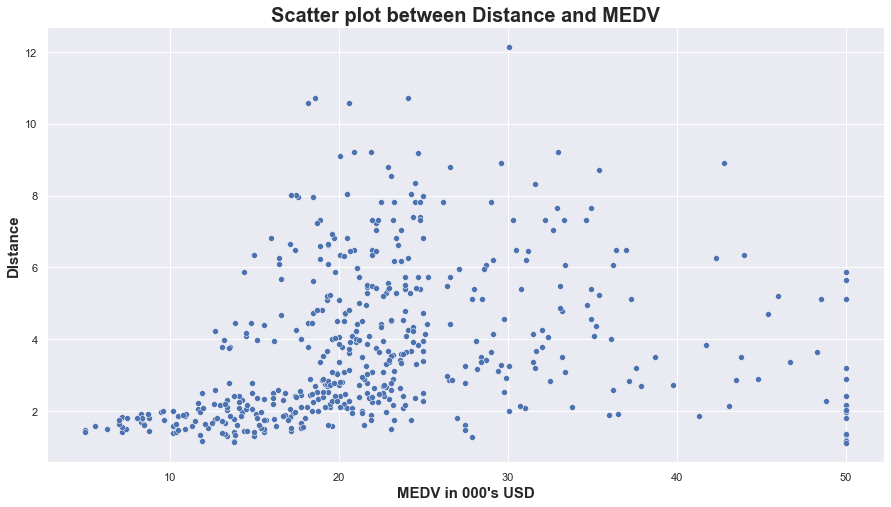

In [18]:
ax = sns.scatterplot(x="MEDV", y="DIS",data = boston_df)
ax.set_title('Scatter plot between Distance and MEDV', fontsize = 20,weight='bold')
ax.set_xlabel("MEDV in 000's USD",fontsize = 15,weight='bold' )
ax.set_ylabel('DIstance',fontsize = 15,weight='bold' )

In [19]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\ObiraDaniel\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 26 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        15:15:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that Boston employment centres distance has an effect the median value of owner occupied homes. The coefficient 1.0916 means that distance increases the value of MEDV